# Optimization

```
import tensorflow 
from tensorflow import keras
```

## Gradient Descent Optimization

* lr : Learning rate 
* decay : decay rate
* epoch_lr = lr * (1 / (1 + decay * iteration))
* momentum : accelerates gradient descent in the relevant direction and dampens oscillations

```
from tensorflow.keras.optimizers import SGD

sgd = SGD(lr=0.01, momentum=0.9, decay=0.01)

model.compile(..., optimizer = sgd)
```

## Reduce LR On Plateau

* monitor : quantity to be monitored
* factor : factor by which the learning rate will be reduced => **new_lr = lr * factor**
* patience : number of epochs with no improvement after which learning rate will be reduced

```
from keras.callbacks import ReduceLROnPlateau 

rlrop = ReduceLROnPlateau(
    monitor = 'val_loss', 
    factor=0.1, 
    patience = 100
)

model.fit(x_train, y_train, callbacks=[rlrop])
```

## Learning Rate Scheduler

```
from keras.callbacks import LearningRateScheduler

def my_lr(epoch, lr): 
    return lr

lrs = LearningRateScheduler(my_lr)

model.fit(x_train, y_train, callbacks=[lrs])
```

## Adaptive LR Gradient Descent

* RMSPROP; 
* Adagrad; 
* Adam; 

```
from keras.optimizers import RMSprop
from keras.optimizers import Adagrad
from keras.optimizers import Adam

opt = RMSprop ()
model.compile (... , optimizer = opt )

opt = Adagrad ()
model.compile (... , optimizer = opt )

opt = Adam ()
model.compile (... , optimizer = opt )
```

# Wine Quality Dataset

## Import dataset 

In [34]:
import pandas as pd

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'

wine = pd.read_csv(url, sep=';')

In [35]:
import sklearn 
from sklearn.utils import shuffle

wine = shuffle(wine)

In [36]:
wine = wine[:1000]
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
989,7.7,0.28,0.39,8.9,0.036,8.0,117.0,0.99350,3.06,0.38,12.000000,7
3607,6.8,0.14,0.18,1.4,0.047,30.0,90.0,0.99164,3.27,0.54,11.200000,6
1604,6.7,0.41,0.01,2.8,0.048,39.0,137.0,0.99420,3.24,0.35,9.500000,5
4651,5.7,0.39,0.25,4.9,0.033,49.0,113.0,0.98966,3.26,0.58,13.100000,7
3481,5.8,0.22,0.30,1.1,0.047,36.0,131.0,0.99200,3.26,0.45,10.400000,5
...,...,...,...,...,...,...,...,...,...,...,...,...
960,7.3,0.24,0.34,15.4,0.050,38.0,174.0,0.99830,3.03,0.42,9.000000,6
4622,6.5,0.50,0.22,4.1,0.036,35.0,131.0,0.99020,3.26,0.55,13.000000,7
2579,6.4,0.28,0.56,1.7,0.156,49.0,106.0,0.99354,3.10,0.37,9.200000,6
4380,5.7,0.31,0.29,7.3,0.050,33.0,143.0,0.99332,3.31,0.50,11.066667,6


## Scatter plot dataset

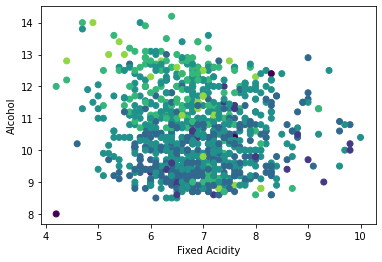

In [37]:
import matplotlib.pyplot as plt 

plt.scatter(wine['fixed acidity'], 
           wine['alcohol'], 
           c = wine['quality'], 
           cmap = 'viridis')
plt.xlabel('Fixed Acidity')
plt.ylabel('Alcohol')
plt.show()

## Effect of Learning Rate and Momentum

### Learning Rate Dynamics

In [38]:
X = wine.iloc[:,:11]
Y = wine.iloc[:,-1]

In [39]:
import numpy as np
import tensorflow
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [40]:
y = to_categorical(Y)
y

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [41]:
n_train = int(len(X) * 80 / 100)
train_X , test_X = X.iloc[:n_train, :] , X.iloc[n_train:, :]
train_y , test_y = y[:n_train], y[n_train:]

In [42]:
train_X.shape , test_X.shape, train_y.shape , test_y.shape

((800, 11), (200, 11), (800, 10), (200, 10))

In [43]:
import tensorflow as tf
model = tf.keras.Sequential()
model.add(Dense(11, activation="softmax"))
model.add(Dense(50, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [44]:
lr = 0.8
model.compile(loss='categorical_crossentropy', 
              optimizer=SGD(learning_rate = lr),
              metrics=['accuracy'])

In [45]:
train_X = np.asarray(train_X)
train_y = np.asarray(train_y)
test_X = np.asarray(test_X)
test_y = np.asarray(test_y)

wine_hist = model.fit(train_X, train_y, epochs = 200, validation_data=(test_X, test_y))

Epoch 1/200
25/25 [==============================] - 0s 6ms/step - loss: 1.4337 - accuracy: 0.4325 - val_loss: 1.4084 - val_accuracy: 0.3400
Epoch 2/200
25/25 [==============================] - 0s 1ms/step - loss: 1.3293 - accuracy: 0.4238 - val_loss: 1.3689 - val_accuracy: 0.4100
Epoch 3/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2806 - accuracy: 0.4700 - val_loss: 1.3866 - val_accuracy: 0.4100
Epoch 4/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2749 - accuracy: 0.4950 - val_loss: 1.3468 - val_accuracy: 0.4100
Epoch 5/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2839 - accuracy: 0.4938 - val_loss: 1.3734 - val_accuracy: 0.4100
Epoch 6/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2723 - accuracy: 0.4913 - val_loss: 1.4422 - val_accuracy: 0.4100
Epoch 7/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2722 - accuracy: 0.4875 - val_loss: 1.4080 - val_accuracy: 0.4100
Epoch 8/200
2

25/25 [==============================] - 0s 1ms/step - loss: 1.2558 - accuracy: 0.4975 - val_loss: 1.3623 - val_accuracy: 0.4100
Epoch 59/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2548 - accuracy: 0.4975 - val_loss: 1.3489 - val_accuracy: 0.4100
Epoch 60/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2596 - accuracy: 0.4975 - val_loss: 1.3522 - val_accuracy: 0.4100
Epoch 61/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2550 - accuracy: 0.4975 - val_loss: 1.3460 - val_accuracy: 0.4100
Epoch 62/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2547 - accuracy: 0.4975 - val_loss: 1.3737 - val_accuracy: 0.4100
Epoch 63/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2549 - accuracy: 0.4975 - val_loss: 1.3478 - val_accuracy: 0.4100
Epoch 64/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2532 - accuracy: 0.4975 - val_loss: 1.3552 - val_accuracy: 0.4100
Epoch 65/200
25/25 

25/25 [==============================] - 0s 1ms/step - loss: 1.2519 - accuracy: 0.4975 - val_loss: 1.3835 - val_accuracy: 0.4100
Epoch 116/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2548 - accuracy: 0.4975 - val_loss: 1.3672 - val_accuracy: 0.4100
Epoch 117/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2521 - accuracy: 0.4975 - val_loss: 1.3644 - val_accuracy: 0.4100
Epoch 118/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2538 - accuracy: 0.4975 - val_loss: 1.3589 - val_accuracy: 0.4100
Epoch 119/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2495 - accuracy: 0.4975 - val_loss: 1.3598 - val_accuracy: 0.4100
Epoch 120/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2552 - accuracy: 0.4975 - val_loss: 1.3587 - val_accuracy: 0.4100
Epoch 121/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2555 - accuracy: 0.4975 - val_loss: 1.3419 - val_accuracy: 0.4100
Epoch 122/200

25/25 [==============================] - 0s 1ms/step - loss: 1.2529 - accuracy: 0.4975 - val_loss: 1.3523 - val_accuracy: 0.4100
Epoch 173/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2548 - accuracy: 0.4975 - val_loss: 1.3578 - val_accuracy: 0.4100
Epoch 174/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2523 - accuracy: 0.4975 - val_loss: 1.3705 - val_accuracy: 0.4100
Epoch 175/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2549 - accuracy: 0.4975 - val_loss: 1.3474 - val_accuracy: 0.4100
Epoch 176/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2539 - accuracy: 0.4975 - val_loss: 1.3627 - val_accuracy: 0.4100
Epoch 177/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2516 - accuracy: 0.4975 - val_loss: 1.3595 - val_accuracy: 0.4100
Epoch 178/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2519 - accuracy: 0.4975 - val_loss: 1.3507 - val_accuracy: 0.4100
Epoch 179/200

Text(0.5, 1.0, 'Learning rate: 0.8')

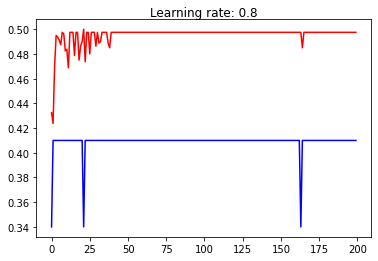

In [46]:
plt.plot(wine_hist.history['accuracy'], label='Train', color='r')
plt.plot(wine_hist.history['val_accuracy'], label='Test', color='b')
plt.title('Learning rate: '+str(lr), pad=-50)

In [47]:
def fit_model(train_X, train_y, test_X, test_y, lr): 
    
    model.compile(loss='categorical_crossentropy', 
              optimizer=SGD(learning_rate = lr),
              metrics=['accuracy'])
    
    train_X = np.asarray(train_X)
    train_y = np.asarray(train_y)
    test_X = np.asarray(test_X)
    test_y = np.asarray(test_y)

    wine_hist = model.fit(train_X, train_y, epochs = 200, validation_data=(test_X, test_y))
    
    plt.plot(wine_hist.history['accuracy'], label='Train', color='r')
    plt.plot(wine_hist.history['val_accuracy'], label='Test', color='b')
    plt.title('Learning rate: '+str(lr), pad=-50)
    plt.show()

Epoch 1/200
25/25 [==============================] - 0s 6ms/step - loss: 1.2517 - accuracy: 0.4975 - val_loss: 1.3557 - val_accuracy: 0.4100
Epoch 2/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2504 - accuracy: 0.4975 - val_loss: 1.3755 - val_accuracy: 0.4100
Epoch 3/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2543 - accuracy: 0.4975 - val_loss: 1.3588 - val_accuracy: 0.4100
Epoch 4/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2513 - accuracy: 0.4975 - val_loss: 1.3709 - val_accuracy: 0.4100
Epoch 5/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2525 - accuracy: 0.4975 - val_loss: 1.3656 - val_accuracy: 0.4100
Epoch 6/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2498 - accuracy: 0.4975 - val_loss: 1.3687 - val_accuracy: 0.4100
Epoch 7/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2502 - accuracy: 0.4975 - val_loss: 1.3598 - val_accuracy: 0.4100
Epoch 8/200
2

25/25 [==============================] - 0s 1ms/step - loss: 1.2528 - accuracy: 0.4975 - val_loss: 1.3574 - val_accuracy: 0.4100
Epoch 59/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2525 - accuracy: 0.4975 - val_loss: 1.3625 - val_accuracy: 0.4100
Epoch 60/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2524 - accuracy: 0.4975 - val_loss: 1.3705 - val_accuracy: 0.4100
Epoch 61/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2537 - accuracy: 0.4975 - val_loss: 1.3519 - val_accuracy: 0.4100
Epoch 62/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2506 - accuracy: 0.4975 - val_loss: 1.3875 - val_accuracy: 0.4100
Epoch 63/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2502 - accuracy: 0.4975 - val_loss: 1.3695 - val_accuracy: 0.4100
Epoch 64/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2544 - accuracy: 0.4975 - val_loss: 1.3596 - val_accuracy: 0.4100
Epoch 65/200
25/25 

25/25 [==============================] - 0s 1ms/step - loss: 1.2456 - accuracy: 0.4975 - val_loss: 1.3455 - val_accuracy: 0.4100
Epoch 116/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2512 - accuracy: 0.4975 - val_loss: 1.3797 - val_accuracy: 0.4100
Epoch 117/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2520 - accuracy: 0.4975 - val_loss: 1.3523 - val_accuracy: 0.4100
Epoch 118/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2577 - accuracy: 0.4975 - val_loss: 1.3526 - val_accuracy: 0.4100
Epoch 119/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2529 - accuracy: 0.4975 - val_loss: 1.3576 - val_accuracy: 0.4100
Epoch 120/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2530 - accuracy: 0.4975 - val_loss: 1.3952 - val_accuracy: 0.4100
Epoch 121/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2512 - accuracy: 0.4975 - val_loss: 1.3552 - val_accuracy: 0.4100
Epoch 122/200

25/25 [==============================] - 0s 1ms/step - loss: 1.2517 - accuracy: 0.4975 - val_loss: 1.3661 - val_accuracy: 0.4100
Epoch 173/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2516 - accuracy: 0.4975 - val_loss: 1.3675 - val_accuracy: 0.4100
Epoch 174/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2536 - accuracy: 0.4975 - val_loss: 1.3881 - val_accuracy: 0.4100
Epoch 175/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2517 - accuracy: 0.4975 - val_loss: 1.3672 - val_accuracy: 0.4100
Epoch 176/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2521 - accuracy: 0.4975 - val_loss: 1.3794 - val_accuracy: 0.4100
Epoch 177/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2531 - accuracy: 0.4975 - val_loss: 1.3620 - val_accuracy: 0.4100
Epoch 178/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2560 - accuracy: 0.4975 - val_loss: 1.3494 - val_accuracy: 0.4100
Epoch 179/200

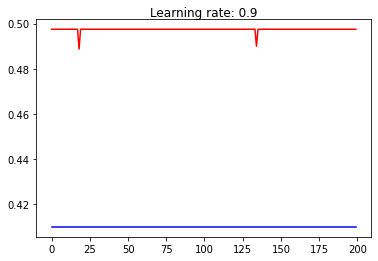

In [48]:
fit_model(train_X, train_y, test_X, test_y, 0.9)

Epoch 1/200
25/25 [==============================] - 0s 6ms/step - loss: 1.2526 - accuracy: 0.4975 - val_loss: 1.3613 - val_accuracy: 0.4100
Epoch 2/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2513 - accuracy: 0.4975 - val_loss: 1.3614 - val_accuracy: 0.4100
Epoch 3/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2514 - accuracy: 0.4975 - val_loss: 1.3672 - val_accuracy: 0.4100
Epoch 4/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2462 - accuracy: 0.4975 - val_loss: 1.3625 - val_accuracy: 0.4100
Epoch 5/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2498 - accuracy: 0.4975 - val_loss: 1.3541 - val_accuracy: 0.4100
Epoch 6/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2523 - accuracy: 0.4975 - val_loss: 1.3587 - val_accuracy: 0.4100
Epoch 7/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2499 - accuracy: 0.4975 - val_loss: 1.3947 - val_accuracy: 0.4100
Epoch 8/200
2

25/25 [==============================] - 0s 1ms/step - loss: 1.2510 - accuracy: 0.4975 - val_loss: 1.3604 - val_accuracy: 0.4100
Epoch 57/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2516 - accuracy: 0.4975 - val_loss: 1.3494 - val_accuracy: 0.4100
Epoch 58/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2466 - accuracy: 0.4975 - val_loss: 1.3882 - val_accuracy: 0.4100
Epoch 59/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2518 - accuracy: 0.4975 - val_loss: 1.3542 - val_accuracy: 0.4100
Epoch 60/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2539 - accuracy: 0.4975 - val_loss: 1.3597 - val_accuracy: 0.4100
Epoch 61/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2516 - accuracy: 0.4975 - val_loss: 1.3441 - val_accuracy: 0.4100
Epoch 62/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2534 - accuracy: 0.4975 - val_loss: 1.3461 - val_accuracy: 0.4100
Epoch 63/200
25/25 

Epoch 114/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2503 - accuracy: 0.4975 - val_loss: 1.3609 - val_accuracy: 0.4100
Epoch 115/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2515 - accuracy: 0.4975 - val_loss: 1.3710 - val_accuracy: 0.4100
Epoch 116/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2553 - accuracy: 0.4975 - val_loss: 1.3588 - val_accuracy: 0.4100
Epoch 117/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2552 - accuracy: 0.4975 - val_loss: 1.3670 - val_accuracy: 0.4100
Epoch 118/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2513 - accuracy: 0.4975 - val_loss: 1.3894 - val_accuracy: 0.4100
Epoch 119/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2577 - accuracy: 0.4975 - val_loss: 1.3604 - val_accuracy: 0.4100
Epoch 120/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2525 - accuracy: 0.4975 - val_loss: 1.3597 - val_accuracy: 0.4100

25/25 [==============================] - 0s 1ms/step - loss: 1.2520 - accuracy: 0.4975 - val_loss: 1.3541 - val_accuracy: 0.4100
Epoch 172/200
25/25 [==============================] - ETA: 0s - loss: 1.3439 - accuracy: 0.43 - 0s 1ms/step - loss: 1.2524 - accuracy: 0.4975 - val_loss: 1.3486 - val_accuracy: 0.4100
Epoch 173/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2502 - accuracy: 0.4975 - val_loss: 1.3758 - val_accuracy: 0.4100
Epoch 174/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2518 - accuracy: 0.4975 - val_loss: 1.3539 - val_accuracy: 0.4100
Epoch 175/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2504 - accuracy: 0.4975 - val_loss: 1.3550 - val_accuracy: 0.4100
Epoch 176/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2501 - accuracy: 0.4975 - val_loss: 1.3628 - val_accuracy: 0.4100
Epoch 177/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2517 - accuracy: 0.4975 - val_loss: 1

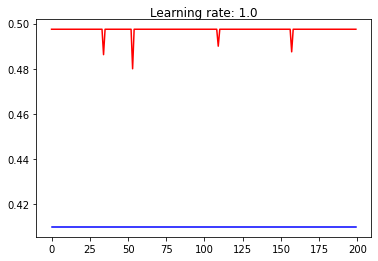

Epoch 1/200
25/25 [==============================] - 0s 6ms/step - loss: 1.2454 - accuracy: 0.4975 - val_loss: 1.3634 - val_accuracy: 0.4100
Epoch 2/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2458 - accuracy: 0.4975 - val_loss: 1.3620 - val_accuracy: 0.4100
Epoch 3/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2451 - accuracy: 0.4975 - val_loss: 1.3629 - val_accuracy: 0.4100
Epoch 4/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2450 - accuracy: 0.4975 - val_loss: 1.3632 - val_accuracy: 0.4100
Epoch 5/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2453 - accuracy: 0.4975 - val_loss: 1.3625 - val_accuracy: 0.4100
Epoch 6/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2449 - accuracy: 0.4975 - val_loss: 1.3626 - val_accuracy: 0.4100
Epoch 7/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2451 - accuracy: 0.4975 - val_loss: 1.3612 - val_accuracy: 0.4100
Epoch 8/200
2

Epoch 59/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2444 - accuracy: 0.4975 - val_loss: 1.3659 - val_accuracy: 0.4100
Epoch 60/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2450 - accuracy: 0.4975 - val_loss: 1.3644 - val_accuracy: 0.4100
Epoch 61/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2451 - accuracy: 0.4975 - val_loss: 1.3648 - val_accuracy: 0.4100
Epoch 62/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2449 - accuracy: 0.4975 - val_loss: 1.3662 - val_accuracy: 0.4100
Epoch 63/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2447 - accuracy: 0.4975 - val_loss: 1.3669 - val_accuracy: 0.4100
Epoch 64/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2446 - accuracy: 0.4975 - val_loss: 1.3645 - val_accuracy: 0.4100
Epoch 65/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2448 - accuracy: 0.4975 - val_loss: 1.3637 - val_accuracy: 0.4100
Epoch 

25/25 [==============================] - 0s 1ms/step - loss: 1.2449 - accuracy: 0.4975 - val_loss: 1.3668 - val_accuracy: 0.4100
Epoch 117/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2453 - accuracy: 0.4975 - val_loss: 1.3677 - val_accuracy: 0.4100
Epoch 118/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2447 - accuracy: 0.4975 - val_loss: 1.3687 - val_accuracy: 0.4100
Epoch 119/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2459 - accuracy: 0.4975 - val_loss: 1.3675 - val_accuracy: 0.4100
Epoch 120/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2448 - accuracy: 0.4975 - val_loss: 1.3661 - val_accuracy: 0.4100
Epoch 121/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2447 - accuracy: 0.4975 - val_loss: 1.3658 - val_accuracy: 0.4100
Epoch 122/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2451 - accuracy: 0.4975 - val_loss: 1.3658 - val_accuracy: 0.4100
Epoch 123/200

25/25 [==============================] - 0s 2ms/step - loss: 1.2449 - accuracy: 0.4975 - val_loss: 1.3666 - val_accuracy: 0.4100
Epoch 174/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2452 - accuracy: 0.4975 - val_loss: 1.3667 - val_accuracy: 0.4100
Epoch 175/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2449 - accuracy: 0.4975 - val_loss: 1.3665 - val_accuracy: 0.4100
Epoch 176/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2451 - accuracy: 0.4975 - val_loss: 1.3663 - val_accuracy: 0.4100
Epoch 177/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2450 - accuracy: 0.4975 - val_loss: 1.3661 - val_accuracy: 0.4100
Epoch 178/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2449 - accuracy: 0.4975 - val_loss: 1.3651 - val_accuracy: 0.4100
Epoch 179/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2447 - accuracy: 0.4975 - val_loss: 1.3659 - val_accuracy: 0.4100
Epoch 180/200

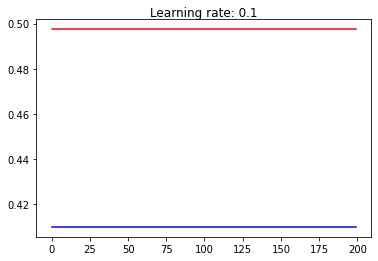

Epoch 1/200
25/25 [==============================] - 0s 6ms/step - loss: 1.2439 - accuracy: 0.4975 - val_loss: 1.3675 - val_accuracy: 0.4100
Epoch 2/200
25/25 [==============================] - ETA: 0s - loss: 1.2334 - accuracy: 0.50 - 0s 1ms/step - loss: 1.2440 - accuracy: 0.4975 - val_loss: 1.3675 - val_accuracy: 0.4100
Epoch 3/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2440 - accuracy: 0.4975 - val_loss: 1.3674 - val_accuracy: 0.4100
Epoch 4/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2440 - accuracy: 0.4975 - val_loss: 1.3674 - val_accuracy: 0.4100
Epoch 5/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2439 - accuracy: 0.4975 - val_loss: 1.3675 - val_accuracy: 0.4100
Epoch 6/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2440 - accuracy: 0.4975 - val_loss: 1.3674 - val_accuracy: 0.4100
Epoch 7/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2440 - accuracy: 0.4975 - val_loss: 1

25/25 [==============================] - 0s 2ms/step - loss: 1.2440 - accuracy: 0.4975 - val_loss: 1.3674 - val_accuracy: 0.4100
Epoch 59/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2440 - accuracy: 0.4975 - val_loss: 1.3674 - val_accuracy: 0.4100
Epoch 60/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2440 - accuracy: 0.4975 - val_loss: 1.3674 - val_accuracy: 0.4100
Epoch 61/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2440 - accuracy: 0.4975 - val_loss: 1.3674 - val_accuracy: 0.4100
Epoch 62/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2440 - accuracy: 0.4975 - val_loss: 1.3674 - val_accuracy: 0.4100
Epoch 63/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2440 - accuracy: 0.4975 - val_loss: 1.3674 - val_accuracy: 0.4100
Epoch 64/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2440 - accuracy: 0.4975 - val_loss: 1.3674 - val_accuracy: 0.4100
Epoch 65/200
25/25 

25/25 [==============================] - 0s 2ms/step - loss: 1.2439 - accuracy: 0.4975 - val_loss: 1.3677 - val_accuracy: 0.4100
Epoch 116/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2440 - accuracy: 0.4975 - val_loss: 1.3677 - val_accuracy: 0.4100
Epoch 117/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2440 - accuracy: 0.4975 - val_loss: 1.3677 - val_accuracy: 0.4100
Epoch 118/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2440 - accuracy: 0.4975 - val_loss: 1.3677 - val_accuracy: 0.4100
Epoch 119/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2440 - accuracy: 0.4975 - val_loss: 1.3677 - val_accuracy: 0.4100
Epoch 120/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2439 - accuracy: 0.4975 - val_loss: 1.3677 - val_accuracy: 0.4100
Epoch 121/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2440 - accuracy: 0.4975 - val_loss: 1.3677 - val_accuracy: 0.4100
Epoch 122/200

25/25 [==============================] - 0s 2ms/step - loss: 1.2440 - accuracy: 0.4975 - val_loss: 1.3677 - val_accuracy: 0.4100
Epoch 173/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2440 - accuracy: 0.4975 - val_loss: 1.3677 - val_accuracy: 0.4100
Epoch 174/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2440 - accuracy: 0.4975 - val_loss: 1.3677 - val_accuracy: 0.4100
Epoch 175/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2440 - accuracy: 0.4975 - val_loss: 1.3677 - val_accuracy: 0.4100
Epoch 176/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2439 - accuracy: 0.4975 - val_loss: 1.3677 - val_accuracy: 0.4100
Epoch 177/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2440 - accuracy: 0.4975 - val_loss: 1.3677 - val_accuracy: 0.4100
Epoch 178/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2440 - accuracy: 0.4975 - val_loss: 1.3677 - val_accuracy: 0.4100
Epoch 179/200

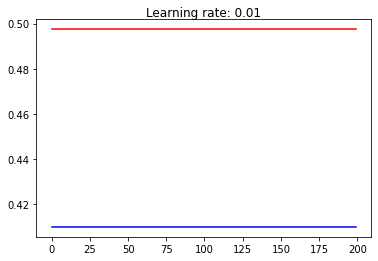

Epoch 1/200
25/25 [==============================] - 0s 10ms/step - loss: 1.2439 - accuracy: 0.4975 - val_loss: 1.3678 - val_accuracy: 0.4100
Epoch 2/200
25/25 [==============================] - 0s 4ms/step - loss: 1.2439 - accuracy: 0.4975 - val_loss: 1.3678 - val_accuracy: 0.4100
Epoch 3/200
25/25 [==============================] - 0s 3ms/step - loss: 1.2439 - accuracy: 0.4975 - val_loss: 1.3678 - val_accuracy: 0.4100
Epoch 4/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2439 - accuracy: 0.4975 - val_loss: 1.3678 - val_accuracy: 0.4100
Epoch 5/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2439 - accuracy: 0.4975 - val_loss: 1.3678 - val_accuracy: 0.4100
Epoch 6/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2439 - accuracy: 0.4975 - val_loss: 1.3678 - val_accuracy: 0.4100
Epoch 7/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2439 - accuracy: 0.4975 - val_loss: 1.3678 - val_accuracy: 0.4100
Epoch 8/200


Epoch 56/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2439 - accuracy: 0.4975 - val_loss: 1.3678 - val_accuracy: 0.4100
Epoch 57/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2439 - accuracy: 0.4975 - val_loss: 1.3678 - val_accuracy: 0.4100
Epoch 58/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2439 - accuracy: 0.4975 - val_loss: 1.3678 - val_accuracy: 0.4100
Epoch 59/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2439 - accuracy: 0.4975 - val_loss: 1.3678 - val_accuracy: 0.4100
Epoch 60/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2439 - accuracy: 0.4975 - val_loss: 1.3678 - val_accuracy: 0.4100
Epoch 61/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2439 - accuracy: 0.4975 - val_loss: 1.3678 - val_accuracy: 0.4100
Epoch 62/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2439 - accuracy: 0.4975 - val_loss: 1.3678 - val_accuracy: 0.4100
Epoch 

25/25 [==============================] - 0s 2ms/step - loss: 1.2439 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 114/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2439 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 115/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2439 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 116/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2439 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 117/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2439 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 118/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2439 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 119/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2439 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 120/200

25/25 [==============================] - 0s 2ms/step - loss: 1.2439 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 171/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2439 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 172/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2439 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 173/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2439 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 174/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2439 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 175/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2439 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 176/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2439 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 177/200

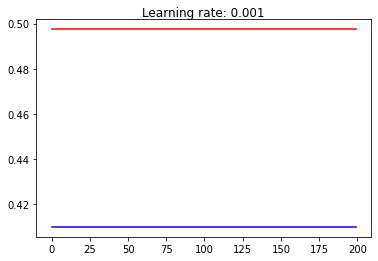

Epoch 1/200
25/25 [==============================] - 0s 6ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 2/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 3/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 4/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 5/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 6/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 7/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 8/200
2

Epoch 59/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 60/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 61/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 62/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 63/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 64/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 65/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 

25/25 [==============================] - 0s 1ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 117/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 118/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 119/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 120/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 121/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 122/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 123/200

25/25 [==============================] - 0s 1ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 174/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 175/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 176/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 177/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 178/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 179/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 180/200

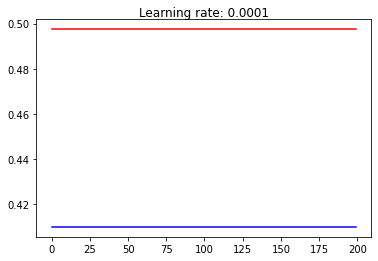

Epoch 1/200
25/25 [==============================] - 0s 6ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 2/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 3/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 4/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 5/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 6/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 7/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 8/200
2

Epoch 59/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 60/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 61/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 62/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 63/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 64/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 65/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 

25/25 [==============================] - 0s 1ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 117/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 118/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 119/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 120/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 121/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 122/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 123/200

25/25 [==============================] - 0s 2ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 174/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 175/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 176/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 177/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 178/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 179/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 180/200

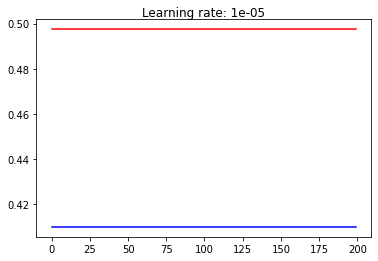

Epoch 1/200
25/25 [==============================] - 0s 6ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 2/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 3/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 4/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 5/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 6/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 7/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 8/200
2

25/25 [==============================] - 0s 2ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 57/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 58/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 59/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 60/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 61/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 62/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 63/200
25/25 

25/25 [==============================] - 0s 2ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 114/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 115/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 116/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 117/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 118/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 119/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 120/200

25/25 [==============================] - 0s 2ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 171/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 172/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 173/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 174/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 175/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 176/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 177/200

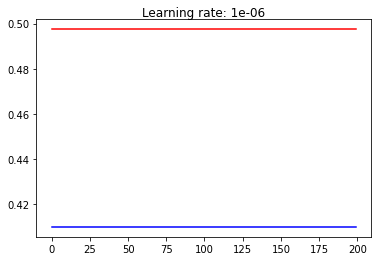

Epoch 1/200
25/25 [==============================] - 0s 6ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 2/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 3/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 4/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 5/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 6/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 7/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 8/200
2

Epoch 59/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 60/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 61/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 62/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 63/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 64/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 65/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 

25/25 [==============================] - 0s 2ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 117/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 118/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 119/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 120/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 121/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 122/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 123/200

25/25 [==============================] - 0s 2ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 174/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 175/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 176/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 177/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 178/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 179/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 180/200

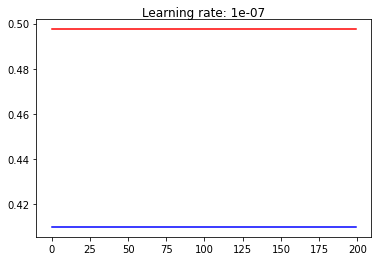

In [49]:
learning_rates = [1E-0, 1E-1, 1E-2, 1E-3, 1E-4, 1E-5, 1E-6, 1E-7]

for i in range (len(learning_rates)):
    # fit model and plot learning curves for a learning rate
    fit_model(train_X, train_y, test_X, test_y, learning_rates[i])
    
    # show learning curves
    plt.show()


In [50]:
def fit_model(train_X, train_y, test_X, test_y, momentum): 
    
    model.compile(loss='categorical_crossentropy', 
              optimizer=SGD(learning_rate = 0.1, momentum = momentum),
              metrics=['accuracy'])
    
    train_X = np.asarray(train_X)
    train_y = np.asarray(train_y)
    test_X = np.asarray(test_X)
    test_y = np.asarray(test_y)

    wine_hist = model.fit(train_X, train_y, epochs = 200, validation_data=(test_X, test_y))
    
    plt.plot(wine_hist.history['accuracy'], label='Train', color='r')
    plt.plot(wine_hist.history['val_accuracy'], label='Test', color='b')
    plt.show()

### Momentum Dynamics

Epoch 1/200
25/25 [==============================] - 0s 6ms/step - loss: 1.2448 - accuracy: 0.4975 - val_loss: 1.3680 - val_accuracy: 0.4100
Epoch 2/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2450 - accuracy: 0.4975 - val_loss: 1.3703 - val_accuracy: 0.4100
Epoch 3/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2449 - accuracy: 0.4975 - val_loss: 1.3692 - val_accuracy: 0.4100
Epoch 4/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2447 - accuracy: 0.4975 - val_loss: 1.3668 - val_accuracy: 0.4100
Epoch 5/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2448 - accuracy: 0.4975 - val_loss: 1.3663 - val_accuracy: 0.4100
Epoch 6/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2449 - accuracy: 0.4975 - val_loss: 1.3679 - val_accuracy: 0.4100
Epoch 7/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2447 - accuracy: 0.4975 - val_loss: 1.3673 - val_accuracy: 0.4100
Epoch 8/200
2

Epoch 59/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2447 - accuracy: 0.4975 - val_loss: 1.3683 - val_accuracy: 0.4100
Epoch 60/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2446 - accuracy: 0.4975 - val_loss: 1.3669 - val_accuracy: 0.4100
Epoch 61/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2448 - accuracy: 0.4975 - val_loss: 1.3676 - val_accuracy: 0.4100
Epoch 62/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2449 - accuracy: 0.4975 - val_loss: 1.3669 - val_accuracy: 0.4100
Epoch 63/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2449 - accuracy: 0.4975 - val_loss: 1.3662 - val_accuracy: 0.4100
Epoch 64/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2451 - accuracy: 0.4975 - val_loss: 1.3674 - val_accuracy: 0.4100
Epoch 65/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2450 - accuracy: 0.4975 - val_loss: 1.3682 - val_accuracy: 0.4100
Epoch 

25/25 [==============================] - 0s 2ms/step - loss: 1.2450 - accuracy: 0.4975 - val_loss: 1.3704 - val_accuracy: 0.4100
Epoch 117/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2448 - accuracy: 0.4975 - val_loss: 1.3699 - val_accuracy: 0.4100
Epoch 118/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2447 - accuracy: 0.4975 - val_loss: 1.3689 - val_accuracy: 0.4100
Epoch 119/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2450 - accuracy: 0.4975 - val_loss: 1.3693 - val_accuracy: 0.4100
Epoch 120/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2451 - accuracy: 0.4975 - val_loss: 1.3688 - val_accuracy: 0.4100
Epoch 121/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2456 - accuracy: 0.4975 - val_loss: 1.3690 - val_accuracy: 0.4100
Epoch 122/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2449 - accuracy: 0.4975 - val_loss: 1.3691 - val_accuracy: 0.4100
Epoch 123/200

25/25 [==============================] - 0s 2ms/step - loss: 1.2448 - accuracy: 0.4975 - val_loss: 1.3675 - val_accuracy: 0.4100
Epoch 174/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2447 - accuracy: 0.4975 - val_loss: 1.3675 - val_accuracy: 0.4100
Epoch 175/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2449 - accuracy: 0.4975 - val_loss: 1.3681 - val_accuracy: 0.4100
Epoch 176/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2448 - accuracy: 0.4975 - val_loss: 1.3671 - val_accuracy: 0.4100
Epoch 177/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2453 - accuracy: 0.4975 - val_loss: 1.3680 - val_accuracy: 0.4100
Epoch 178/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2449 - accuracy: 0.4975 - val_loss: 1.3692 - val_accuracy: 0.4100
Epoch 179/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2451 - accuracy: 0.4975 - val_loss: 1.3698 - val_accuracy: 0.4100
Epoch 180/200

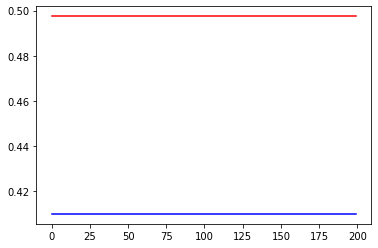

Epoch 1/200
25/25 [==============================] - 0s 6ms/step - loss: 1.2452 - accuracy: 0.4975 - val_loss: 1.3651 - val_accuracy: 0.4100
Epoch 2/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2459 - accuracy: 0.4975 - val_loss: 1.3685 - val_accuracy: 0.4100
Epoch 3/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2456 - accuracy: 0.4975 - val_loss: 1.3642 - val_accuracy: 0.4100
Epoch 4/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2451 - accuracy: 0.4975 - val_loss: 1.3625 - val_accuracy: 0.4100
Epoch 5/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2459 - accuracy: 0.4975 - val_loss: 1.3631 - val_accuracy: 0.4100
Epoch 6/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2455 - accuracy: 0.4975 - val_loss: 1.3689 - val_accuracy: 0.4100
Epoch 7/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2459 - accuracy: 0.4975 - val_loss: 1.3667 - val_accuracy: 0.4100
Epoch 8/200
2

Epoch 59/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2459 - accuracy: 0.4975 - val_loss: 1.3638 - val_accuracy: 0.4100
Epoch 60/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2455 - accuracy: 0.4975 - val_loss: 1.3608 - val_accuracy: 0.4100
Epoch 61/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2459 - accuracy: 0.4975 - val_loss: 1.3650 - val_accuracy: 0.4100
Epoch 62/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2456 - accuracy: 0.4975 - val_loss: 1.3617 - val_accuracy: 0.4100
Epoch 63/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2458 - accuracy: 0.4975 - val_loss: 1.3693 - val_accuracy: 0.4100
Epoch 64/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2460 - accuracy: 0.4975 - val_loss: 1.3626 - val_accuracy: 0.4100
Epoch 65/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2449 - accuracy: 0.4975 - val_loss: 1.3646 - val_accuracy: 0.4100
Epoch 

25/25 [==============================] - 0s 2ms/step - loss: 1.2452 - accuracy: 0.4975 - val_loss: 1.3699 - val_accuracy: 0.4100
Epoch 117/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2460 - accuracy: 0.4975 - val_loss: 1.3671 - val_accuracy: 0.4100
Epoch 118/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2458 - accuracy: 0.4975 - val_loss: 1.3646 - val_accuracy: 0.4100
Epoch 119/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2454 - accuracy: 0.4975 - val_loss: 1.3666 - val_accuracy: 0.4100
Epoch 120/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2453 - accuracy: 0.4975 - val_loss: 1.3636 - val_accuracy: 0.4100
Epoch 121/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2451 - accuracy: 0.4975 - val_loss: 1.3645 - val_accuracy: 0.4100
Epoch 122/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2455 - accuracy: 0.4975 - val_loss: 1.3641 - val_accuracy: 0.4100
Epoch 123/200

25/25 [==============================] - 0s 2ms/step - loss: 1.2454 - accuracy: 0.4975 - val_loss: 1.3616 - val_accuracy: 0.4100
Epoch 174/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2464 - accuracy: 0.4975 - val_loss: 1.3655 - val_accuracy: 0.4100
Epoch 175/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2457 - accuracy: 0.4975 - val_loss: 1.3675 - val_accuracy: 0.4100
Epoch 176/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2464 - accuracy: 0.4975 - val_loss: 1.3614 - val_accuracy: 0.4100
Epoch 177/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2459 - accuracy: 0.4975 - val_loss: 1.3649 - val_accuracy: 0.4100
Epoch 178/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2450 - accuracy: 0.4975 - val_loss: 1.3626 - val_accuracy: 0.4100
Epoch 179/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2463 - accuracy: 0.4975 - val_loss: 1.3625 - val_accuracy: 0.4100
Epoch 180/200

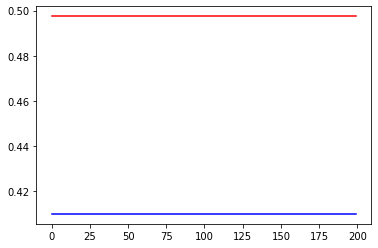

Epoch 1/200
25/25 [==============================] - 0s 6ms/step - loss: 1.2474 - accuracy: 0.4975 - val_loss: 1.3643 - val_accuracy: 0.4100
Epoch 2/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2518 - accuracy: 0.4975 - val_loss: 1.3675 - val_accuracy: 0.4100
Epoch 3/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2480 - accuracy: 0.4975 - val_loss: 1.3821 - val_accuracy: 0.4100
Epoch 4/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2482 - accuracy: 0.4975 - val_loss: 1.3599 - val_accuracy: 0.4100
Epoch 5/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2484 - accuracy: 0.4975 - val_loss: 1.3518 - val_accuracy: 0.4100
Epoch 6/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2482 - accuracy: 0.4975 - val_loss: 1.3901 - val_accuracy: 0.4100
Epoch 7/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2534 - accuracy: 0.4975 - val_loss: 1.3465 - val_accuracy: 0.4100
Epoch 8/200
2

Epoch 59/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2477 - accuracy: 0.4975 - val_loss: 1.3753 - val_accuracy: 0.4100
Epoch 60/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2486 - accuracy: 0.4975 - val_loss: 1.3479 - val_accuracy: 0.4100
Epoch 61/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2520 - accuracy: 0.4975 - val_loss: 1.3585 - val_accuracy: 0.4100
Epoch 62/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2557 - accuracy: 0.4975 - val_loss: 1.3487 - val_accuracy: 0.4100
Epoch 63/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2535 - accuracy: 0.4975 - val_loss: 1.3535 - val_accuracy: 0.4100
Epoch 64/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2496 - accuracy: 0.4975 - val_loss: 1.4155 - val_accuracy: 0.4100
Epoch 65/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2554 - accuracy: 0.4975 - val_loss: 1.3635 - val_accuracy: 0.4100
Epoch 

25/25 [==============================] - 0s 2ms/step - loss: 1.2615 - accuracy: 0.4975 - val_loss: 1.3737 - val_accuracy: 0.4100
Epoch 117/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2534 - accuracy: 0.4975 - val_loss: 1.3563 - val_accuracy: 0.4100
Epoch 118/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2475 - accuracy: 0.4975 - val_loss: 1.3621 - val_accuracy: 0.4100
Epoch 119/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2495 - accuracy: 0.4975 - val_loss: 1.3674 - val_accuracy: 0.4100
Epoch 120/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2521 - accuracy: 0.4975 - val_loss: 1.3665 - val_accuracy: 0.4100
Epoch 121/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2514 - accuracy: 0.4975 - val_loss: 1.3633 - val_accuracy: 0.4100
Epoch 122/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2465 - accuracy: 0.4975 - val_loss: 1.3636 - val_accuracy: 0.4100
Epoch 123/200

25/25 [==============================] - 0s 1ms/step - loss: 1.2488 - accuracy: 0.4975 - val_loss: 1.3778 - val_accuracy: 0.4100
Epoch 174/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2534 - accuracy: 0.4975 - val_loss: 1.3627 - val_accuracy: 0.4100
Epoch 175/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2492 - accuracy: 0.4975 - val_loss: 1.3494 - val_accuracy: 0.4100
Epoch 176/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2517 - accuracy: 0.4975 - val_loss: 1.3623 - val_accuracy: 0.4100
Epoch 177/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2492 - accuracy: 0.4975 - val_loss: 1.3794 - val_accuracy: 0.4100
Epoch 178/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2507 - accuracy: 0.4975 - val_loss: 1.3546 - val_accuracy: 0.4100
Epoch 179/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2507 - accuracy: 0.4975 - val_loss: 1.3522 - val_accuracy: 0.4100
Epoch 180/200

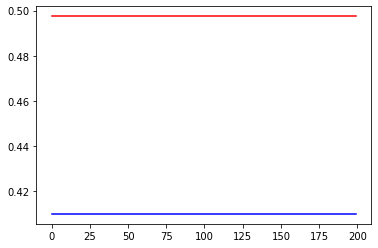

Epoch 1/200
25/25 [==============================] - 0s 6ms/step - loss: 1.2574 - accuracy: 0.4975 - val_loss: 1.4056 - val_accuracy: 0.4100
Epoch 2/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2660 - accuracy: 0.4975 - val_loss: 1.3505 - val_accuracy: 0.4100
Epoch 3/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2762 - accuracy: 0.4975 - val_loss: 1.3508 - val_accuracy: 0.4100
Epoch 4/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2580 - accuracy: 0.4975 - val_loss: 1.4031 - val_accuracy: 0.4100
Epoch 5/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2618 - accuracy: 0.4975 - val_loss: 1.3900 - val_accuracy: 0.4100
Epoch 6/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2687 - accuracy: 0.4975 - val_loss: 1.3686 - val_accuracy: 0.4100
Epoch 7/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2593 - accuracy: 0.4975 - val_loss: 1.3936 - val_accuracy: 0.4100
Epoch 8/200
2

Epoch 59/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2701 - accuracy: 0.4363 - val_loss: 1.4554 - val_accuracy: 0.4100
Epoch 60/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2834 - accuracy: 0.4650 - val_loss: 1.3608 - val_accuracy: 0.3400
Epoch 61/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2816 - accuracy: 0.4913 - val_loss: 1.3568 - val_accuracy: 0.4100
Epoch 62/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2719 - accuracy: 0.4450 - val_loss: 1.4440 - val_accuracy: 0.4100
Epoch 63/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2791 - accuracy: 0.4087 - val_loss: 1.4775 - val_accuracy: 0.4100
Epoch 64/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2918 - accuracy: 0.4225 - val_loss: 1.3553 - val_accuracy: 0.4100
Epoch 65/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2897 - accuracy: 0.4787 - val_loss: 1.3690 - val_accuracy: 0.3400
Epoch 

25/25 [==============================] - 0s 2ms/step - loss: 1.3555 - accuracy: 0.4325 - val_loss: 1.4073 - val_accuracy: 0.3400
Epoch 117/200
25/25 [==============================] - 0s 2ms/step - loss: 1.3268 - accuracy: 0.4313 - val_loss: 1.4942 - val_accuracy: 0.4100
Epoch 118/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2753 - accuracy: 0.4325 - val_loss: 1.4253 - val_accuracy: 0.4100
Epoch 119/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2697 - accuracy: 0.4787 - val_loss: 1.3587 - val_accuracy: 0.3400
Epoch 120/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2566 - accuracy: 0.4875 - val_loss: 1.3960 - val_accuracy: 0.4100
Epoch 121/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2609 - accuracy: 0.4975 - val_loss: 1.3922 - val_accuracy: 0.4100
Epoch 122/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2815 - accuracy: 0.4975 - val_loss: 1.4246 - val_accuracy: 0.4100
Epoch 123/200

25/25 [==============================] - 0s 2ms/step - loss: 1.2516 - accuracy: 0.4975 - val_loss: 1.4394 - val_accuracy: 0.4100
Epoch 174/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2631 - accuracy: 0.4975 - val_loss: 1.3770 - val_accuracy: 0.4100
Epoch 175/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2834 - accuracy: 0.4975 - val_loss: 1.3800 - val_accuracy: 0.4100
Epoch 176/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2903 - accuracy: 0.4975 - val_loss: 1.3868 - val_accuracy: 0.4100
Epoch 177/200
25/25 [==============================] - 0s 1ms/step - loss: 1.3008 - accuracy: 0.4700 - val_loss: 1.4249 - val_accuracy: 0.4100
Epoch 178/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2705 - accuracy: 0.4975 - val_loss: 1.4102 - val_accuracy: 0.4100
Epoch 179/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2752 - accuracy: 0.4975 - val_loss: 1.4006 - val_accuracy: 0.4100
Epoch 180/200

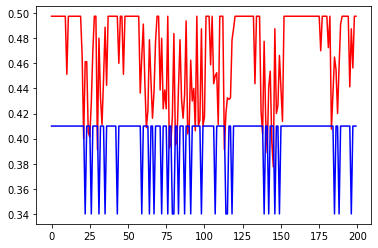

In [51]:
momentums = [0.0, 0.5, 0.9, 0.99]


for i in range (len(momentums)):
    # fit model and plot learning curves for a learning rate
    fit_model(train_X, train_y, test_X, test_y, momentums[i])

### Learning Rate Decay

In [52]:
def decay_lrate(initial_rate, decay, iteration): 
    return initial_rate * (1.0 / (1.0 + decay * iteration))

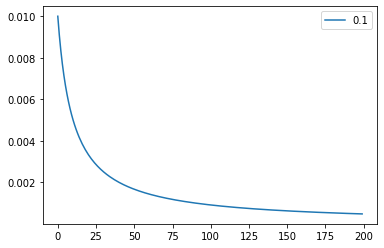

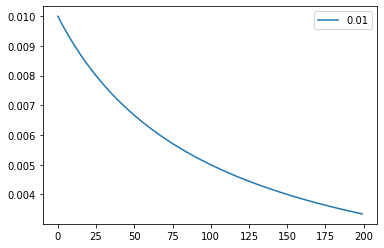

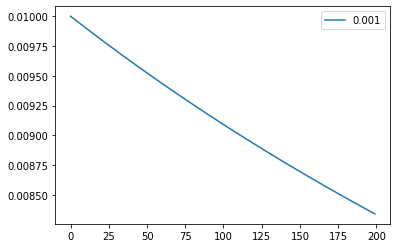

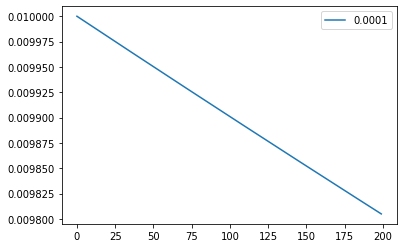

In [53]:
decays = [1E-1, 1E-2, 1E-3, 1E-4]

lrate = 0.01
n_updates = 200

for decay in decays:
    # calculate learning rates for updates
    lrates = [decay_lrate(lrate, decay, i) for i in range (n_updates)]
    
    # plot result
    plt.plot(lrates, label=str(decay))
    plt.legend()
    plt.show()

## Effect of Adaptive Learning Rates

In [54]:
def fit_model(train_X, train_y, test_X, test_y, optimizer): 
    model.compile(loss='categorical_crossentropy', 
              optimizer=optimizer,
              metrics=['accuracy'])
    
    train_X = np.asarray(train_X)
    train_y = np.asarray(train_y)
    test_X = np.asarray(test_X)
    test_y = np.asarray(test_y)

    wine_hist = model.fit(train_X, train_y, epochs = 200, validation_data=(test_X, test_y))
    
    plt.plot(wine_hist.history['accuracy'], label='Train', color='r')
    plt.plot(wine_hist.history['val_accuracy'], label='Test', color='b')
    plt.show()

In [55]:
sgd = tf.keras.optimizers.SGD()
adam = tf.keras.optimizers.Adam()
adagrad = tf.keras.optimizers.Adagrad()
rms_prop = tf.keras.optimizers.RMSprop()

Epoch 1/200
25/25 [==============================] - 0s 6ms/step - loss: 1.2843 - accuracy: 0.4975 - val_loss: 1.4475 - val_accuracy: 0.4100
Epoch 2/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2804 - accuracy: 0.4975 - val_loss: 1.4416 - val_accuracy: 0.4100
Epoch 3/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2769 - accuracy: 0.4975 - val_loss: 1.4361 - val_accuracy: 0.4100
Epoch 4/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2737 - accuracy: 0.4975 - val_loss: 1.4311 - val_accuracy: 0.4100
Epoch 5/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2709 - accuracy: 0.4975 - val_loss: 1.4265 - val_accuracy: 0.4100
Epoch 6/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2683 - accuracy: 0.4975 - val_loss: 1.4222 - val_accuracy: 0.4100
Epoch 7/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2660 - accuracy: 0.4975 - val_loss: 1.4183 - val_accuracy: 0.4100
Epoch 8/200
2

Epoch 59/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2450 - accuracy: 0.4975 - val_loss: 1.3752 - val_accuracy: 0.4100
Epoch 60/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2450 - accuracy: 0.4975 - val_loss: 1.3752 - val_accuracy: 0.4100
Epoch 61/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2449 - accuracy: 0.4975 - val_loss: 1.3751 - val_accuracy: 0.4100
Epoch 62/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2449 - accuracy: 0.4975 - val_loss: 1.3750 - val_accuracy: 0.4100
Epoch 63/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2450 - accuracy: 0.4975 - val_loss: 1.3750 - val_accuracy: 0.4100
Epoch 64/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2449 - accuracy: 0.4975 - val_loss: 1.3750 - val_accuracy: 0.4100
Epoch 65/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2449 - accuracy: 0.4975 - val_loss: 1.3749 - val_accuracy: 0.4100
Epoch 

25/25 [==============================] - 0s 2ms/step - loss: 1.2443 - accuracy: 0.4975 - val_loss: 1.3737 - val_accuracy: 0.4100
Epoch 117/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2443 - accuracy: 0.4975 - val_loss: 1.3737 - val_accuracy: 0.4100
Epoch 118/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2443 - accuracy: 0.4975 - val_loss: 1.3737 - val_accuracy: 0.4100
Epoch 119/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2443 - accuracy: 0.4975 - val_loss: 1.3737 - val_accuracy: 0.4100
Epoch 120/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2443 - accuracy: 0.4975 - val_loss: 1.3737 - val_accuracy: 0.4100
Epoch 121/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2443 - accuracy: 0.4975 - val_loss: 1.3737 - val_accuracy: 0.4100
Epoch 122/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2443 - accuracy: 0.4975 - val_loss: 1.3737 - val_accuracy: 0.4100
Epoch 123/200

25/25 [==============================] - 0s 2ms/step - loss: 1.2441 - accuracy: 0.4975 - val_loss: 1.3733 - val_accuracy: 0.4100
Epoch 174/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2441 - accuracy: 0.4975 - val_loss: 1.3733 - val_accuracy: 0.4100
Epoch 175/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2441 - accuracy: 0.4975 - val_loss: 1.3733 - val_accuracy: 0.4100
Epoch 176/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2441 - accuracy: 0.4975 - val_loss: 1.3733 - val_accuracy: 0.4100
Epoch 177/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2441 - accuracy: 0.4975 - val_loss: 1.3733 - val_accuracy: 0.4100
Epoch 178/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2441 - accuracy: 0.4975 - val_loss: 1.3732 - val_accuracy: 0.4100
Epoch 179/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2441 - accuracy: 0.4975 - val_loss: 1.3733 - val_accuracy: 0.4100
Epoch 180/200

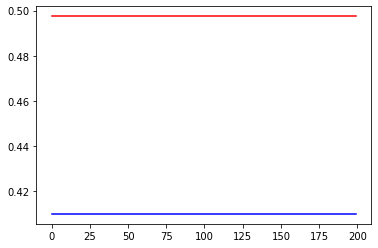

In [56]:
fit_model(train_X, train_y, test_X, test_y, sgd)

Epoch 1/200
25/25 [==============================] - 0s 7ms/step - loss: 1.2441 - accuracy: 0.4975 - val_loss: 1.3743 - val_accuracy: 0.4100
Epoch 2/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2440 - accuracy: 0.4975 - val_loss: 1.3738 - val_accuracy: 0.4100
Epoch 3/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2440 - accuracy: 0.4975 - val_loss: 1.3736 - val_accuracy: 0.4100
Epoch 4/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2440 - accuracy: 0.4975 - val_loss: 1.3742 - val_accuracy: 0.4100
Epoch 5/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2440 - accuracy: 0.4975 - val_loss: 1.3740 - val_accuracy: 0.4100
Epoch 6/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2440 - accuracy: 0.4975 - val_loss: 1.3742 - val_accuracy: 0.4100
Epoch 7/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2440 - accuracy: 0.4975 - val_loss: 1.3742 - val_accuracy: 0.4100
Epoch 8/200
2

Epoch 59/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2439 - accuracy: 0.4975 - val_loss: 1.3784 - val_accuracy: 0.4100
Epoch 60/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2439 - accuracy: 0.4975 - val_loss: 1.3782 - val_accuracy: 0.4100
Epoch 61/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2439 - accuracy: 0.4975 - val_loss: 1.3781 - val_accuracy: 0.4100
Epoch 62/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3784 - val_accuracy: 0.4100
Epoch 63/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2439 - accuracy: 0.4975 - val_loss: 1.3782 - val_accuracy: 0.4100
Epoch 64/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3787 - val_accuracy: 0.4100
Epoch 65/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3788 - val_accuracy: 0.4100
Epoch 

25/25 [==============================] - 0s 2ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3820 - val_accuracy: 0.4100
Epoch 117/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3818 - val_accuracy: 0.4100
Epoch 118/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3821 - val_accuracy: 0.4100
Epoch 119/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2440 - accuracy: 0.4975 - val_loss: 1.3818 - val_accuracy: 0.4100
Epoch 120/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3822 - val_accuracy: 0.4100
Epoch 121/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3822 - val_accuracy: 0.4100
Epoch 122/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2439 - accuracy: 0.4975 - val_loss: 1.3820 - val_accuracy: 0.4100
Epoch 123/200

25/25 [==============================] - 0s 2ms/step - loss: 1.2439 - accuracy: 0.4975 - val_loss: 1.3848 - val_accuracy: 0.4100
Epoch 174/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3849 - val_accuracy: 0.4100
Epoch 175/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2439 - accuracy: 0.4975 - val_loss: 1.3851 - val_accuracy: 0.4100
Epoch 176/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3851 - val_accuracy: 0.4100
Epoch 177/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3852 - val_accuracy: 0.4100
Epoch 178/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3850 - val_accuracy: 0.4100
Epoch 179/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3852 - val_accuracy: 0.4100
Epoch 180/200

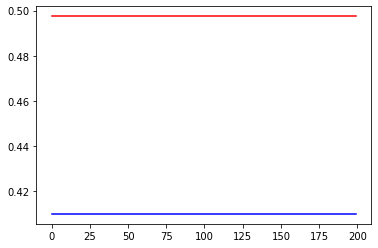

In [57]:
fit_model(train_X, train_y, test_X, test_y, adam)

Epoch 1/200
25/25 [==============================] - 0s 6ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3865 - val_accuracy: 0.4100
Epoch 2/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3865 - val_accuracy: 0.4100
Epoch 3/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3865 - val_accuracy: 0.4100
Epoch 4/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3865 - val_accuracy: 0.4100
Epoch 5/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3865 - val_accuracy: 0.4100
Epoch 6/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3865 - val_accuracy: 0.4100
Epoch 7/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2438 - accuracy: 0.4975 - val_loss: 1.3865 - val_accuracy: 0.4100
Epoch 8/200
2

Epoch 57/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2437 - accuracy: 0.4975 - val_loss: 1.3865 - val_accuracy: 0.4100
Epoch 58/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2437 - accuracy: 0.4975 - val_loss: 1.3865 - val_accuracy: 0.4100
Epoch 59/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2437 - accuracy: 0.4975 - val_loss: 1.3865 - val_accuracy: 0.4100
Epoch 60/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2437 - accuracy: 0.4975 - val_loss: 1.3865 - val_accuracy: 0.4100
Epoch 61/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2437 - accuracy: 0.4975 - val_loss: 1.3865 - val_accuracy: 0.4100
Epoch 62/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2437 - accuracy: 0.4975 - val_loss: 1.3865 - val_accuracy: 0.4100
Epoch 63/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2437 - accuracy: 0.4975 - val_loss: 1.3865 - val_accuracy: 0.4100
Epoch 

25/25 [==============================] - 0s 2ms/step - loss: 1.2437 - accuracy: 0.4975 - val_loss: 1.3864 - val_accuracy: 0.4100
Epoch 115/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2437 - accuracy: 0.4975 - val_loss: 1.3864 - val_accuracy: 0.4100
Epoch 116/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2437 - accuracy: 0.4975 - val_loss: 1.3864 - val_accuracy: 0.4100
Epoch 117/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2437 - accuracy: 0.4975 - val_loss: 1.3864 - val_accuracy: 0.4100
Epoch 118/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2437 - accuracy: 0.4975 - val_loss: 1.3864 - val_accuracy: 0.4100
Epoch 119/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2437 - accuracy: 0.4975 - val_loss: 1.3864 - val_accuracy: 0.4100
Epoch 120/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2437 - accuracy: 0.4975 - val_loss: 1.3864 - val_accuracy: 0.4100
Epoch 121/200

25/25 [==============================] - 0s 2ms/step - loss: 1.2437 - accuracy: 0.4975 - val_loss: 1.3864 - val_accuracy: 0.4100
Epoch 172/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2437 - accuracy: 0.4975 - val_loss: 1.3864 - val_accuracy: 0.4100
Epoch 173/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2437 - accuracy: 0.4975 - val_loss: 1.3864 - val_accuracy: 0.4100
Epoch 174/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2437 - accuracy: 0.4975 - val_loss: 1.3864 - val_accuracy: 0.4100
Epoch 175/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2437 - accuracy: 0.4975 - val_loss: 1.3864 - val_accuracy: 0.4100
Epoch 176/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2437 - accuracy: 0.4975 - val_loss: 1.3864 - val_accuracy: 0.4100
Epoch 177/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2437 - accuracy: 0.4975 - val_loss: 1.3864 - val_accuracy: 0.4100
Epoch 178/200

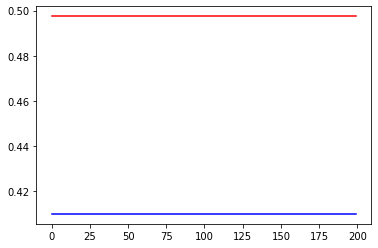

In [58]:
fit_model(train_X, train_y, test_X, test_y, adagrad)

Epoch 1/200
25/25 [==============================] - 0s 6ms/step - loss: 1.2440 - accuracy: 0.4975 - val_loss: 1.3868 - val_accuracy: 0.4100
Epoch 2/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2439 - accuracy: 0.4975 - val_loss: 1.3870 - val_accuracy: 0.4100
Epoch 3/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2439 - accuracy: 0.4975 - val_loss: 1.3872 - val_accuracy: 0.4100
Epoch 4/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2439 - accuracy: 0.4975 - val_loss: 1.3873 - val_accuracy: 0.4100
Epoch 5/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2439 - accuracy: 0.4975 - val_loss: 1.3873 - val_accuracy: 0.4100
Epoch 6/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2439 - accuracy: 0.4975 - val_loss: 1.3873 - val_accuracy: 0.4100
Epoch 7/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2439 - accuracy: 0.4975 - val_loss: 1.3875 - val_accuracy: 0.4100
Epoch 8/200
2

Epoch 59/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2439 - accuracy: 0.4975 - val_loss: 1.3916 - val_accuracy: 0.4100
Epoch 60/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2439 - accuracy: 0.4975 - val_loss: 1.3917 - val_accuracy: 0.4100
Epoch 61/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2439 - accuracy: 0.4975 - val_loss: 1.3919 - val_accuracy: 0.4100
Epoch 62/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2439 - accuracy: 0.4975 - val_loss: 1.3918 - val_accuracy: 0.4100
Epoch 63/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2439 - accuracy: 0.4975 - val_loss: 1.3920 - val_accuracy: 0.4100
Epoch 64/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2439 - accuracy: 0.4975 - val_loss: 1.3922 - val_accuracy: 0.4100
Epoch 65/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2439 - accuracy: 0.4975 - val_loss: 1.3923 - val_accuracy: 0.4100
Epoch 

25/25 [==============================] - 0s 2ms/step - loss: 1.2439 - accuracy: 0.4975 - val_loss: 1.3959 - val_accuracy: 0.4100
Epoch 117/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2439 - accuracy: 0.4975 - val_loss: 1.3959 - val_accuracy: 0.4100
Epoch 118/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2439 - accuracy: 0.4975 - val_loss: 1.3959 - val_accuracy: 0.4100
Epoch 119/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2439 - accuracy: 0.4975 - val_loss: 1.3959 - val_accuracy: 0.4100
Epoch 120/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2439 - accuracy: 0.4975 - val_loss: 1.3960 - val_accuracy: 0.4100
Epoch 121/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2439 - accuracy: 0.4975 - val_loss: 1.3961 - val_accuracy: 0.4100
Epoch 122/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2439 - accuracy: 0.4975 - val_loss: 1.3962 - val_accuracy: 0.4100
Epoch 123/200

25/25 [==============================] - 0s 1ms/step - loss: 1.2439 - accuracy: 0.4975 - val_loss: 1.3985 - val_accuracy: 0.4100
Epoch 174/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2439 - accuracy: 0.4975 - val_loss: 1.3985 - val_accuracy: 0.4100
Epoch 175/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2440 - accuracy: 0.4975 - val_loss: 1.3986 - val_accuracy: 0.4100
Epoch 176/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2440 - accuracy: 0.4975 - val_loss: 1.3986 - val_accuracy: 0.4100
Epoch 177/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2439 - accuracy: 0.4975 - val_loss: 1.3987 - val_accuracy: 0.4100
Epoch 178/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2439 - accuracy: 0.4975 - val_loss: 1.3987 - val_accuracy: 0.4100
Epoch 179/200
25/25 [==============================] - 0s 1ms/step - loss: 1.2440 - accuracy: 0.4975 - val_loss: 1.3988 - val_accuracy: 0.4100
Epoch 180/200

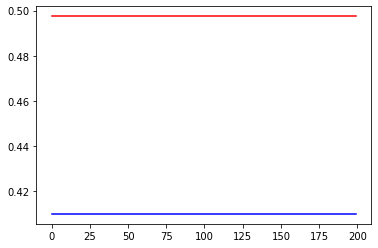

In [59]:
fit_model(train_X, train_y, test_X, test_y, rms_prop)